This code is for all the visualizations of sleep details of the student wellness group

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import pywedge as pw

C:\Users\rajnishk\AppData\Local\Temp\ipykernel_29320\462549450.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_sleep = pd.read_csv(r'C:\Users\rajnishk\OneDrive - Michigan Medicine\Documents\Student Wellness Dataset\student_wellness_sleep_details.csv',
                 parse_dates=["SLEEP_DATE","SLEEP_START_DATE", "SLEEP_END_DATE"])

df_MOOD = pd.read_csv(r'C:\Users\rajnishk\OneDrive - Michigan Medicine\Documents\Student Wellness Dataset\df_MOOD_SWG.csv', 
                     parse_dates=["METRIC_START_DATE", "METRIC_END_DATE"],index_col=0)

In [3]:
df_MOOD.rename(columns={'METRIC_START_DATE': 'SLEEP_DATE'}, inplace=True) # So that I can merge two dataframes. 
df_MOOD

,STUDY_METRIC_AGGREGATE_ID,STUDY_PRTCPT_ID,STUDY_ID,STEP_COUNT,SLEEP_COUNT,MOOD,SLEEP_DATE,METRIC_END_DATE
0,4024199,XGJ8AFS8,401,1131,0,6,2023-01-20,2023-01-20
1,4025733,XGJ8AFS8,401,6957,485,7,2023-01-21,2023-01-21
2,4031073,XGJ8AFS8,401,7395,587,8,2023-01-22,2023-01-22
3,4036413,XGJ8AFS8,401,7039,561,7,2023-01-23,2023-01-23
4,4041773,XGJ8AFS8,401,6257,458,7,2023-01-24,2023-01-24
...,...,...,...,...,...,...,...,...
6146,5425225,JU3R5P4M,401,0,0,0,2023-10-03,2023-10-03
6147,5430705,JU3R5P4M,401,0,0,0,2023-10-04,2023-10-04
6148,5436166,JU3R5P4M,401,0,0,0,2023-10-05,2023-10-05
6149,5441625,JU3R5P4M,401,0,0,0,2023-10-06,2023-10-06


In [4]:
df_MOOD_sleep = pd.merge(df_sleep,df_MOOD, on = ['STUDY_PRTCPT_ID','SLEEP_DATE'], how = 'inner' ) 

In [5]:
sleep_vars = ['ASLEEP_VALUE', 'INBED_VALUE', 'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN', 'LIGHT_COUNT', 
              'REM_MIN', 'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT', 'ASLEEP_MIN', 'ASLEEP_COUNT', 
              'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT', 'RESTLESS_MIN']
v = df_sleep[sleep_vars].isna().sum(0)
v = v[v < 500].index.tolist()
vv = ["STUDY_PRTCPT_ID", "SLEEP_START_DATE", "SLEEP_END_DATE", "SLEEP_DATE"] + v
dx = df_sleep[vv].copy()
dx["YEARDAY"] = dx["SLEEP_DATE"].dt.dayofyear
dx["DAYOFWEEK"] = dx["SLEEP_DATE"].dt.dayofweek
dx["SLEEP_START_TIME"] = (dx["SLEEP_START_DATE"] - dx["SLEEP_START_DATE"].dt.normalize()) / pd.Timedelta(hours=1)
dx["SLEEP_END_TIME"] = (dx["SLEEP_END_DATE"] - dx["SLEEP_END_DATE"].dt.normalize()) / pd.Timedelta(hours=1)
dx["SLEEP_START_SIN"] = np.sin(2*np.pi*dx["SLEEP_START_TIME"]/24)
dx["SLEEP_START_COS"] = np.cos(2*np.pi*dx["SLEEP_START_TIME"]/24)
dx["SLEEP_END_SIN"] = np.sin(2*np.pi*dx["SLEEP_END_TIME"]/24)
dx["SLEEP_END_COS"] = np.cos(2*np.pi*dx["SLEEP_END_TIME"]/24)
dx["YEARDAY_SIN"] = np.sin(2*np.pi*dx["YEARDAY"]/366)
dx["YEARDAY_COS"] = np.cos(2*np.pi*dx["YEARDAY"]/366)

dx["STUDYDAY"] = dx["YEARDAY"] - dx.groupby("STUDY_PRTCPT_ID")["YEARDAY"].transform(np.min)
# dx = dx.drop(columns=["SLEEP_START_DATE", "SLEEP_END_DATE", "SLEEP_START_TIME", "SLEEP_END_TIME", "SLEEP_DATE"])
dx = dx.dropna()
dx.columns

C:\Users\rajnishk\AppData\Local\Temp\ipykernel_29320\4270248083.py:19: FutureWarning: The provided callable <function min at 0x000001F4772265F0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dx["STUDYDAY"] = dx["YEARDAY"] - dx.groupby("STUDY_PRTCPT_ID")["YEARDAY"].transform(np.min)


Index(['STUDY_PRTCPT_ID', 'SLEEP_START_DATE', 'SLEEP_END_DATE', 'SLEEP_DATE',
       'ASLEEP_VALUE', 'INBED_VALUE', 'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN',
       'LIGHT_COUNT', 'REM_MIN', 'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT',
       'YEARDAY', 'DAYOFWEEK', 'SLEEP_START_TIME', 'SLEEP_END_TIME',
       'SLEEP_START_SIN', 'SLEEP_START_COS', 'SLEEP_END_SIN', 'SLEEP_END_COS',
       'YEARDAY_SIN', 'YEARDAY_COS', 'STUDYDAY'],
      dtype='object')

In [6]:
df_MOOD_sleep_polar = pd.merge(dx,df_MOOD, on = ['STUDY_PRTCPT_ID','SLEEP_DATE'], how = 'inner' )
# print("Number of measurements for both MOOD and sleep is", np.shape(df_MOOD_sleep_polar)[0])
df_MOOD_sleep_polar_MOOD_NZ = df_MOOD_sleep_polar[df_MOOD_sleep_polar.MOOD !=0]   # Lots of data goes away.
df_MOOD_sleep_polar_MOOD_NZ

,STUDY_PRTCPT_ID,SLEEP_START_DATE,SLEEP_END_DATE,SLEEP_DATE,ASLEEP_VALUE,INBED_VALUE,DEEP_MIN,DEEP_COUNT,LIGHT_MIN,LIGHT_COUNT,...,SLEEP_END_COS,YEARDAY_SIN,YEARDAY_COS,STUDYDAY,STUDY_METRIC_AGGREGATE_ID,STUDY_ID,STEP_COUNT,SLEEP_COUNT,MOOD,METRIC_END_DATE
0,XGJ8AFS8,2023-01-20 20:08:00,2023-01-21 05:48:30,2023-01-21,485,580,67.0,5.0,320.0,25.0,...,0.050157,0.352752,0.935717,0,4025733,401,6957,485,7,2023-01-21
1,XGJ8AFS8,2023-01-21 20:33:30,2023-01-22 07:55:30,2023-01-22,587,682,59.0,6.0,423.0,40.0,...,-0.482900,0.368763,0.929523,1,4031073,401,7395,587,8,2023-01-22
2,XGJ8AFS8,2023-01-22 19:37:30,2023-01-23 07:07:30,2023-01-23,561,690,71.0,5.0,394.0,40.0,...,-0.290285,0.384665,0.923056,2,4036413,401,7039,561,7,2023-01-23
3,XGJ8AFS8,2023-01-23 21:34:00,2023-01-24 06:02:30,2023-01-24,458,508,91.0,4.0,243.0,31.0,...,-0.010908,0.400454,0.916317,3,4041773,401,6257,458,7,2023-01-24
4,XGJ8AFS8,2023-01-24 20:20:30,2023-01-25 06:32:00,2023-01-25,492,611,44.0,4.0,360.0,30.0,...,-0.139173,0.416125,0.909308,4,4047133,401,3809,492,7,2023-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,3IJBZPI8,2023-04-13 23:23:00,2023-04-14 07:01:00,2023-04-14,398,458,39.0,6.0,328.0,33.0,...,-0.263031,0.977064,-0.212947,43,4476751,401,115,398,7,2023-04-14
1787,JU3R5P4M,2023-03-28 00:14:30,2023-03-28 05:33:30,2023-03-28,263,319,23.0,2.0,189.0,19.0,...,0.115371,0.997018,0.077175,1,4380458,401,4729,263,2,2023-03-28
1788,JU3R5P4M,2023-03-29 01:38:30,2023-03-29 11:21:30,2023-03-29,481,583,56.0,2.0,390.0,47.0,...,-0.985923,0.998195,0.060049,2,4385858,401,1556,481,4,2023-03-29
1789,JU3R5P4M,2023-04-01 02:17:00,2023-04-01 18:04:00,2023-04-01,738,947,104.0,6.0,623.0,63.0,...,0.017452,0.999963,0.008583,5,4402280,401,1424,738,3,2023-04-01


In [7]:
datetime_cols = df_MOOD_sleep_polar_MOOD_NZ.select_dtypes(include=['datetime64[ns]']).columns
df_no_datetime = df_MOOD_sleep_polar_MOOD_NZ.drop(datetime_cols, axis=1)
df_no_datetime = df_no_datetime.drop('STUDY_PRTCPT_ID', axis = 1)
df_MOOD = df_MOOD.drop('STUDY_PRTCPT_ID', axis = 1)
datetime_cols_MOOD = df_MOOD.select_dtypes(include=['datetime64[ns]']).columns
df_MOOD = df_MOOD.drop(datetime_cols_MOOD, axis = 1)

In [8]:
# df_reset = df_MOOD_no_datetime.reset_index(drop=True)
df_MOOD

,STUDY_METRIC_AGGREGATE_ID,STUDY_ID,STEP_COUNT,SLEEP_COUNT,MOOD
0,4024199,401,1131,0,6
1,4025733,401,6957,485,7
2,4031073,401,7395,587,8
3,4036413,401,7039,561,7
4,4041773,401,6257,458,7
...,...,...,...,...,...
6146,5425225,401,0,0,0
6147,5430705,401,0,0,0
6148,5436166,401,0,0,0
6149,5441625,401,0,0,0


In [9]:
mc = pw.Pywedge_Charts(df_MOOD, c = None, y='MOOD')
# mc = pw.Pywedge_Charts(df_MOOD_sleep_polar_MOOD_NZ)
charts = mc.make_charts()

NameError: name 'pw' is not defined

In [ ]:
!python --version

In [10]:
dx = df_MOOD_sleep_polar_MOOD_NZ.copy()

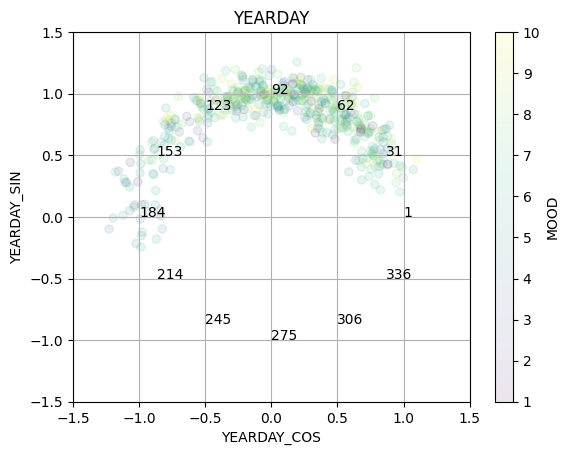

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Assuming dx is your dataframe and it's already defined
# dx = pd.DataFrame({...})

# Clear the current figure
plt.clf()

# Set up the plot title and labels
plt.title("YEARDAY")
plt.xlabel("YEARDAY_COS")
plt.ylabel("YEARDAY_SIN")

# Set up the grid, limits
plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add random noise to the X and Y coordinates
e1 = 0.1 * np.random.normal(size=dx.shape[0])
e2 = 0.1 * np.random.normal(size=dx.shape[0])

# Create a scatter plot where the color is based on the 'MOOD' values
# Choose a colormap that fits best with your data (e.g., 'viridis', 'plasma', 'inferno', etc.)
plt.scatter(dx["YEARDAY_COS"]+e1, dx["YEARDAY_SIN"]+e2, c=dx["MOOD"], cmap='viridis', alpha=0.1)

# Adding text labels for the months around the circle
for i in range(12):
    x = np.cos(2 * np.pi * i * 30.5 / 366)
    y = np.sin(2 * np.pi * i * 30.5 / 366)
    plt.text(x, y, str(int(30.5 * i + 1)))

# Display colorbar showing the mapping from 'MOOD' values to colors
plt.colorbar(label='MOOD')

# Show the plot
plt.show()

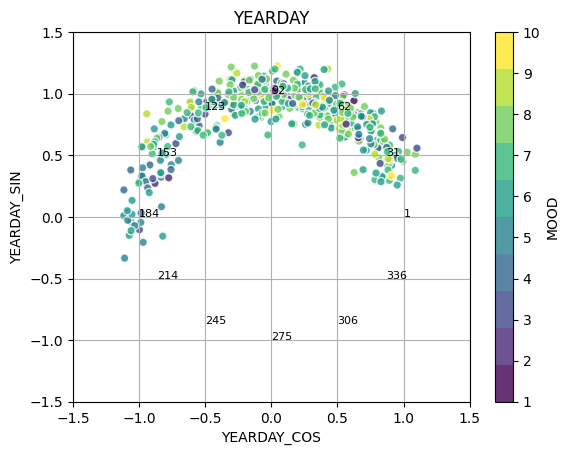

In [14]:
# Clear the current figure
plt.clf()


# Set up the plot title and labels

plt.title("YEARDAY")
plt.xlabel("YEARDAY_COS")
plt.ylabel("YEARDAY_SIN")

# Set up the grid, limits
plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add random noise to the X and Y coordinates
e1 = 0.1 * np.random.normal(size=dx.shape[0])
e2 = 0.1 * np.random.normal(size=dx.shape[0])

# Create a discrete colormap
n_colors = dx['MOOD'].nunique()
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))  # Or pick a colormap of your choice
discrete_cmap = ListedColormap(colors)

# Create a scatter plot with the discrete colormap
scatter = plt.scatter(dx["YEARDAY_COS"]+e1, dx["YEARDAY_SIN"]+e2, c=dx["MOOD"],
                      cmap=discrete_cmap, alpha=0.8, edgecolors='w')

# Adding text labels for the months around the circle
for i in range(12):
    x = np.cos(2 * np.pi * i * 30.5 / 366)
    y = np.sin(2 * np.pi * i * 30.5 / 366)
    plt.text(x, y, str(int(30.5 * i + 1)), fontsize=8)

# Display colorbar showing the mapping from 'MOOD' values to colors
cbar = plt.colorbar(scatter, ticks=np.arange(1, n_colors+1), spacing='proportional')
cbar.set_label('MOOD')

# Show the plot
plt.show()

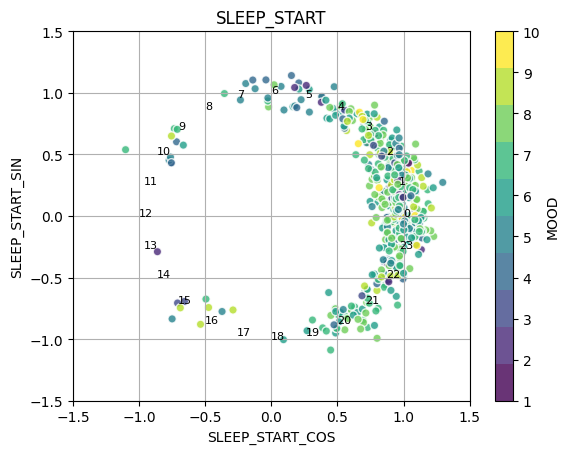

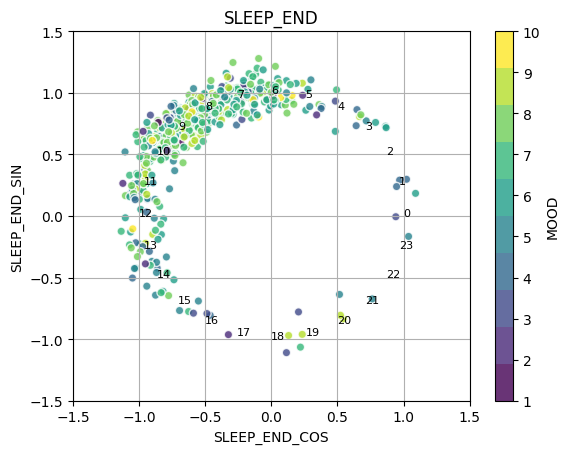

In [15]:
def plot_clock(vn, df):
    plt.clf()
    plt.title(vn)
    plt.xlabel("%s_COS" % vn)
    plt.ylabel("%s_SIN" % vn)
    plt.grid(True)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    e1 = 0.1 * np.random.normal(size=df.shape[0])
    e2 = 0.1 * np.random.normal(size=df.shape[0])

    # Create a discrete colormap
    n_colors = df['MOOD'].nunique()
    colors = plt.cm.viridis(np.linspace(0, 1, n_colors))  # You can pick any colormap
    discrete_cmap = ListedColormap(colors)

    # Create a scatter plot with the discrete colormap
    scatter = plt.scatter(df["%s_COS" % vn] + e1, df["%s_SIN" % vn] + e2, c=df["MOOD"],
                          cmap=discrete_cmap, alpha=0.8, edgecolors='w')

    # Add labels for the points around the circle (e.g. for clock hours)
    for i in range(24):
        x = np.cos(2 * np.pi * i / 24)
        y = np.sin(2 * np.pi * i / 24)
        plt.text(x, y, str(i), fontsize=8)

    # Display colorbar showing the mapping from 'MOOD' values to colors
    cbar = plt.colorbar(scatter, ticks=np.arange(1, n_colors + 1), spacing='proportional')
    cbar.set_label('MOOD')

    plt.show()

# Call the function with different column names
plot_clock("SLEEP_START", dx)
plot_clock("SLEEP_END", dx)

In [ ]:
df_MOOD_sleep_polar_MOOD_NZ.info()